In [6]:
import pandas as pd

In [7]:
df=pd.read_csv("C:/Users/OsamaAl-Mofti/Desktop/HTW Berlin/3rd semester/AI/electricityConsumptionAndProductioction.csv")

In [8]:
df.head()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36772 entries, 0 to 36771
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DateTime       36772 non-null  object
 1   Consumption    36772 non-null  int64 
 2   Production     36772 non-null  int64 
 3   Nuclear        36772 non-null  int64 
 4   Wind           36772 non-null  int64 
 5   Hydroelectric  36772 non-null  int64 
 6   Oil and Gas    36772 non-null  int64 
 7   Coal           36772 non-null  int64 
 8   Solar          36772 non-null  int64 
 9   Biomass        36772 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 2.8+ MB


In [10]:
df.shape

(36772, 10)

In [11]:
import matplotlib.pyplot as plt

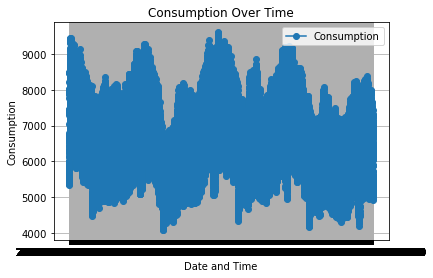

In [19]:
plt.plot(df['DateTime'], df['Consumption'], label='Consumption', marker='o')
plt.title('Consumption Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Consumption')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# total number of missing 
total_missing_variables=df.isna().sum().sum()
total_missing_variables

0

In [13]:
# Check for duplicate rows
duplicates = df[df.duplicated()]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
                  DateTime  Consumption  Production  Nuclear  Wind  \
7180   2019-10-27 03:00:00         5196        4459     1373    74   
15917  2020-10-25 03:00:00         5220        5412     1418  1188   
24822  2021-10-31 03:00:00         5341        5258     1415   141   
33559  2022-10-30 03:00:00         4503        5269     1384   544   

       Hydroelectric  Oil and Gas  Coal  Solar  Biomass  
7180             725          719  1515      0       50  
15917           1098          594  1048      0       65  
24822            934         1314  1393      0       58  
33559           1289          924  1073      0       52  


In [14]:
df = df.drop_duplicates()

In [15]:
# Check for duplicate rows
duplicates = df[df.duplicated()]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [DateTime, Consumption, Production, Nuclear, Wind, Hydroelectric, Oil and Gas, Coal, Solar, Biomass]
Index: []


In [16]:
df['DateTime'] = pd.to_datetime(df['DateTime'])


In [17]:
# Extract date-related features
df['day_of_week'] = df['DateTime'].dt.dayofweek
df['hour_of_day'] = df['DateTime'].dt.hour
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

In [18]:
pip install holidays

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
# Identify Romanian holidays
import holidays
ro_holidays = holidays.Romania(years=df['DateTime'].dt.year)
df['is_holiday'] = df['DateTime'].dt.date.astype('datetime64').isin(ro_holidays)

In [20]:
print(df)

                 DateTime  Consumption  Production  Nuclear  Wind  \
0     2019-01-01 00:00:00         6352        6527     1395    79   
1     2019-01-01 01:00:00         6116        5701     1393    96   
2     2019-01-01 02:00:00         5873        5676     1393   142   
3     2019-01-01 03:00:00         5682        5603     1397   191   
4     2019-01-01 04:00:00         5557        5454     1393   159   
...                   ...          ...         ...      ...   ...   
36767 2023-03-12 19:00:00         6500        6643     1407   111   
36768 2023-03-12 20:00:00         6471        6484     1408    58   
36769 2023-03-12 21:00:00         6194        6413     1406    39   
36770 2023-03-12 22:00:00         5708        6217     1406     8   
36771 2023-03-12 23:00:00         5409        5900     1403     0   

       Hydroelectric  Oil and Gas  Coal  Solar  Biomass  day_of_week  \
0               1383         1896  1744      0       30            1   
1               1112       

In [21]:
from scipy.stats import zscore
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numerical column and find outliers using Z-score
for column in numerical_columns:
    z_scores = zscore(df[column])
    outliers = df[(abs(z_scores) > 3)]  # Using a Z-score threshold of 3 (both higher and lower)
    num_outliers = len(outliers)
    print(f'Number of outliers in {column}: {num_outliers}')

Number of outliers in Consumption: 0
Number of outliers in Production: 34
Number of outliers in Nuclear: 0
Number of outliers in Wind: 0
Number of outliers in Hydroelectric: 264
Number of outliers in Oil and Gas: 0
Number of outliers in Coal: 161
Number of outliers in Solar: 49
Number of outliers in Biomass: 1
Number of outliers in day_of_week: 0
Number of outliers in hour_of_day: 0


In [22]:
# Save all outliers to a CSV file
all_outliers.to_csv('outliers.csv', index=False)


NameError: name 'all_outliers' is not defined

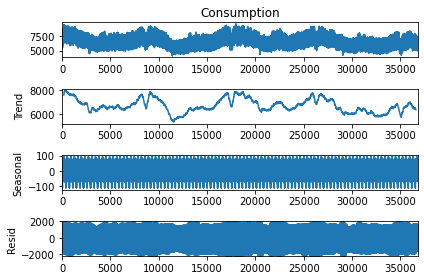

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Consumption'], model='additive', period=365)

# Plot the decomposed components
result.plot()
plt.show()

In [24]:
# Aggregate data on a monthly basis
df_monthly = df.resample('M').sum()

# Create box plots for each month
df_monthly.boxplot(column='Consumption', by=df_monthly.index.month, figsize=(12, 6))
plt.title('Monthly Box Plots for Electricity Consumption')
plt.xlabel('Month')
plt.ylabel('Consumption')
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [25]:
# Calculate the average consumption for each month
monthly_average = df.groupby(df.index.month)['Consumption'].mean()

# Create a seasonal plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_average, marker='o')
plt.title('Seasonal Plot for Monthly Average Electricity Consumption')
plt.xlabel('Month')
plt.ylabel('Consumption')
plt.show()

AttributeError: 'Int64Index' object has no attribute 'month'

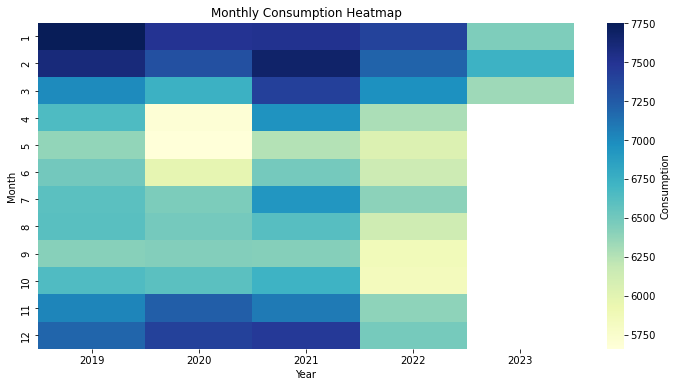

In [157]:
# Reshape the data for the heatmap
heatmap_data = df.pivot_table(values='Consumption', index=df.index.month, columns=df.index.year, aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Consumption'})
plt.title('Monthly Consumption Heatmap')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

In [26]:
from statsmodels.tsa.arima.model import ARIMA

In [30]:
import pandas as pd

# Assuming your DataFrame is named df
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

# Now, you can resample the 'Consumption' column
daily_data = df['Consumption'].resample('D').sum()


In [34]:
import itertools

p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Generate all possible combinations of p, d, q
combinations = list(itertools.product(p_values, d_values, q_values))

# Evaluate each combination and choose the best one
best_score, best_params = float('inf'), None
for order in combinations:
    try:
        model = ARIMA(daily_data, order=order)
        results = model.fit()
        score = results.aic  # You can also use BIC or other metrics
        if score < best_score:
            best_score, best_params = score, order
    except:
        continue

print("Best AIC Score:", best_score)
print("Best (p, d, q):", best_params)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\s

Best AIC Score: 32547.353865429097
Best (p, d, q): (2, 0, 2)


In [35]:
# Fit ARIMA model
model = ARIMA(daily_data, order=(2, 0, 2))  # You need to choose appropriate values for p, d, and q
results = model.fit()

# Display model summary
print(results.summary())


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:            Consumption   No. Observations:                 1532
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -16267.677
Date:                Wed, 13 Dec 2023   AIC                          32547.354
Time:                        18:33:13   BIC                          32579.360
Sample:                    01-01-2019   HQIC                         32559.265
                         - 03-12-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.61e+05   4646.800     34.646      0.000    1.52e+05     1.7e+05
ar.L1          0.8345      0.045     18.729      0.000       0.747       0.922
ar.L2          0.1516      0.043      3.548      0.0

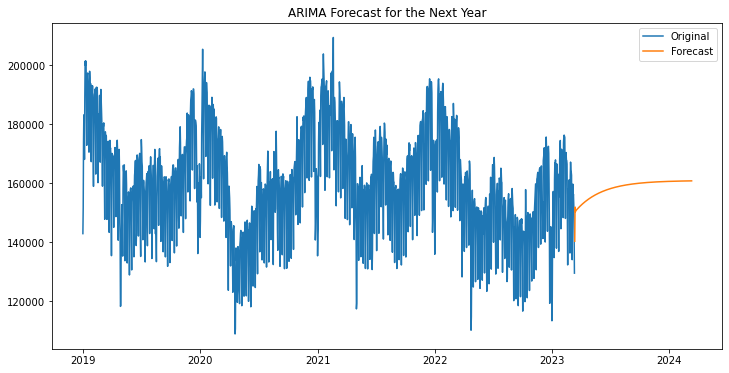

In [36]:
# Number of days to forecast
forecast_days = 365  # Adjust this value for the desired forecasting horizon

# Forecast future values
forecast = results.forecast(steps=forecast_days)

# Plot the original and forecasted time series
plt.figure(figsize=(12, 6))
plt.plot(daily_data, label='Original')
plt.plot(pd.date_range(start=daily_data.index[-1], periods=forecast_days + 1, freq='D')[1:], forecast, label='Forecast')
plt.legend()
plt.title('ARIMA Forecast for the Next Year')
plt.show()
